#Importing required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Loading the Dataset

In [46]:
df = pd.read_csv('/content/drive/MyDrive/My Projects on ML/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#Data Preprocessing

In [47]:
df = df.drop(columns=['Unnamed: 0'])

In [48]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


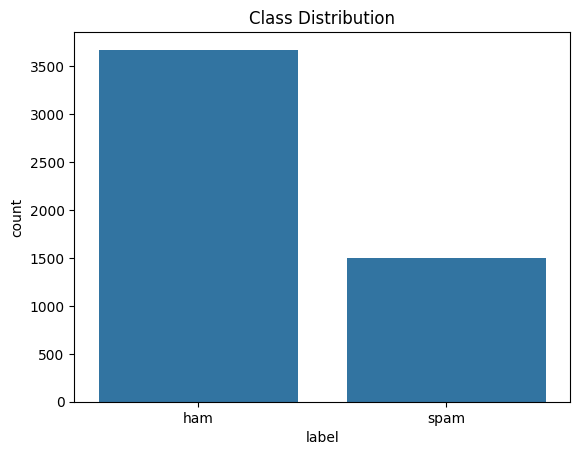

In [49]:
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

In [50]:
spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))

In [51]:
spam_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(ham_words)

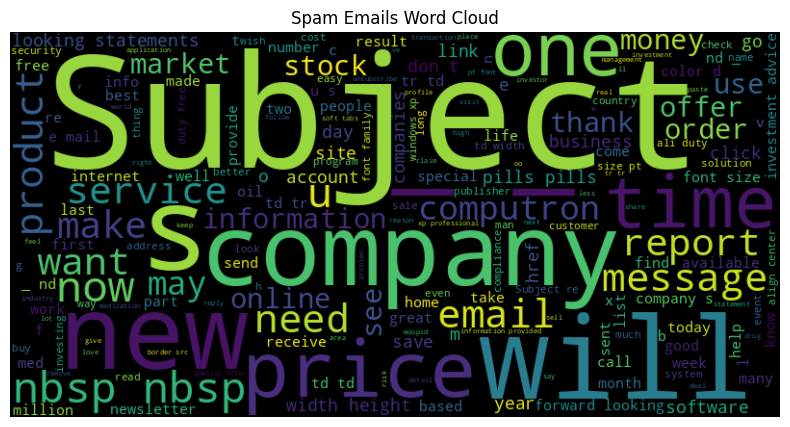

In [52]:
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Emails Word Cloud')
plt.axis('off')
plt.show()

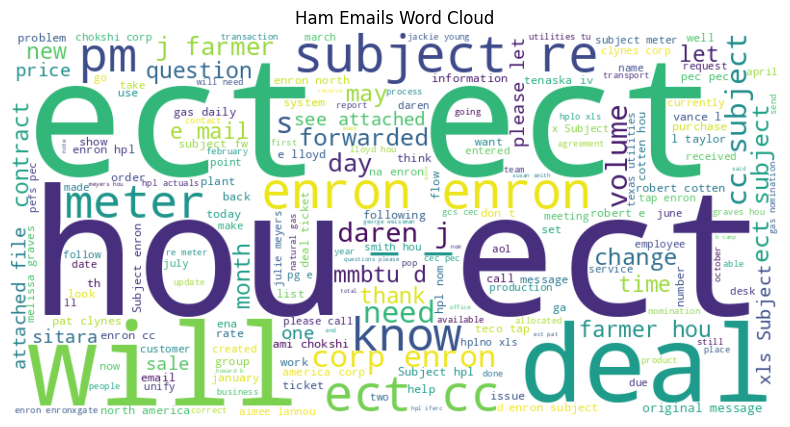

In [53]:
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Emails Word Cloud')
plt.axis('off')
plt.show()

In [54]:
stop_words = set(stopwords.words('english'))

In [55]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [56]:
label_encoder = LabelEncoder()
df['label_num'] = label_encoder.fit_transform(df['label'])

#Train-Test Split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label_num'], test_size=0.2, random_state=42)

#TF-ID Vectorization

In [58]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

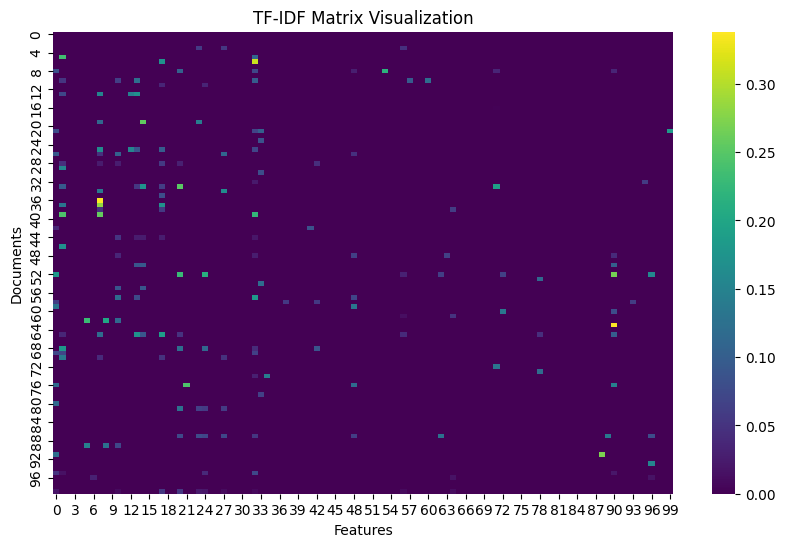

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_train_tfidf[:100, :100], cmap='viridis', annot=False)
plt.title('TF-IDF Matrix Visualization')
plt.xlabel('Features')
plt.ylabel('Documents')
plt.show()

#Model Creation and Compilation

In [60]:
model = Sequential([
    Dense(64, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(X_train_tfidf, y_train, epochs=10, validation_data=(X_test_tfidf, y_test), batch_size=32)

Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7030 - loss: 0.5827 - val_accuracy: 0.9720 - val_loss: 0.1154
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9789 - loss: 0.1023 - val_accuracy: 0.9845 - val_loss: 0.0443
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9905 - loss: 0.0410 - val_accuracy: 0.9894 - val_loss: 0.0372
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9979 - loss: 0.0156 - val_accuracy: 0.9903 - val_loss: 0.0345
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9986 - loss: 0.0093 - val_accuracy: 0.9903 - val_loss: 0.0336
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9983 - loss: 0.0092 - val_accuracy: 0.9903 - val_loss: 0.0352
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accuracy: 0.9894 - val_loss: 0.0345
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9999 - loss: 0.0028 - val_accu

#Evaluation

In [63]:
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0580
Test Accuracy: 0.9894


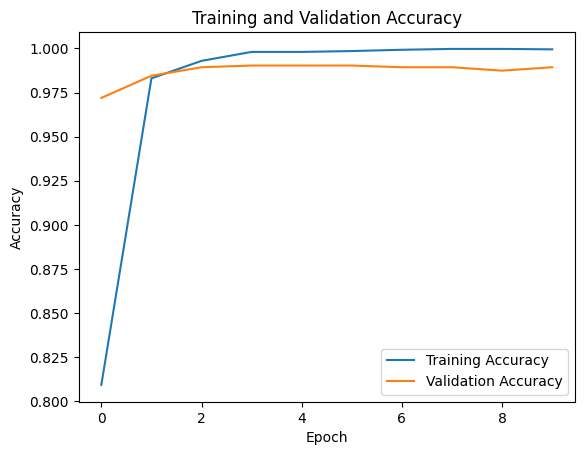

In [64]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

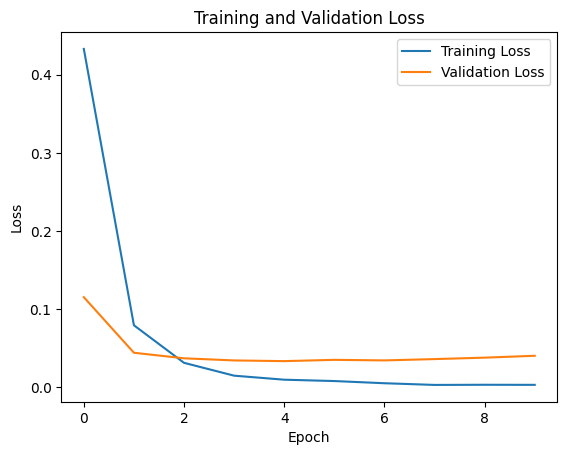

In [65]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


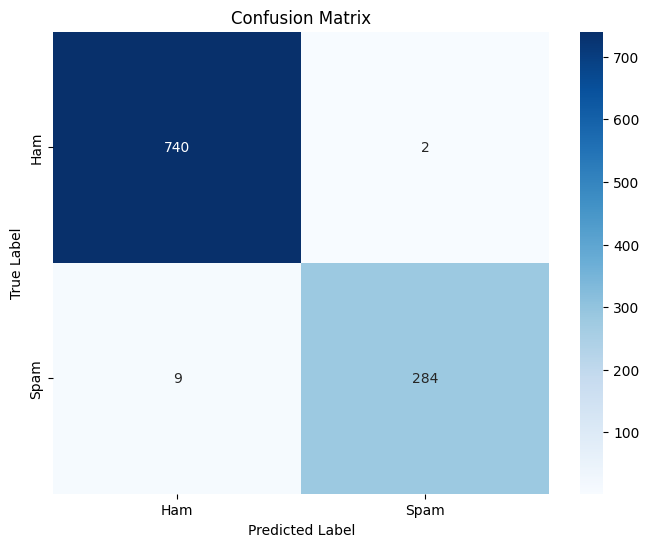

In [66]:
y_pred = (model.predict(X_test_tfidf) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Validation of trained model with new Input data

In [67]:
def classify_new_email(email_text, model, tfidf_vectorizer):
    processed_text = preprocess_text(email_text)
    email_tfidf = tfidf_vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(email_tfidf)
    if prediction[0] > 0.5:
        return 'spam'
    else:
        return 'ham'
email_text = "Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls"
email_category = classify_new_email(email_text, model, tfidf_vectorizer)
print(f"The email is classified as: {email_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The email is classified as: ham


#Therefore, The created model performs well with 99.03% of Accuracy (Feed-Forward Neural Network a Multi-Layer Perceptron)